In [1]:
import pandas  as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
import numpy   as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, plot_roc_curve, precision_recall_curve 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  precision_recall_curve, roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve


In [2]:
dt_diagnostico = pd.read_excel('Base_Diagnostico_Final_Algoritimo.xlsx')


In [31]:
dt_diagnostico.count()

DATA                              220066
CO_SEQ_SISCAN_MAMOGRAFIA_ATEND    220066
Faixa de Idade                    220066
PREVALENCIA                       220066
CHANCE_POS_TESTE                  220066
Razao_Prob_Negativa               220066
HISTORICO_FAMLIAR                 220066
HORMONAL                          220066
SENSIBILIDADE                     220066
ESPECIFICIDADE                    220066
Risco_Hist_Acum                   220066
Risco_Horm_Acum                   220066
Risco_Hist_Horm_Ac                220066
CO_BIRADS                         220066
DIAGNÓSTICO                       220066
Record Count                      220065
dtype: int64

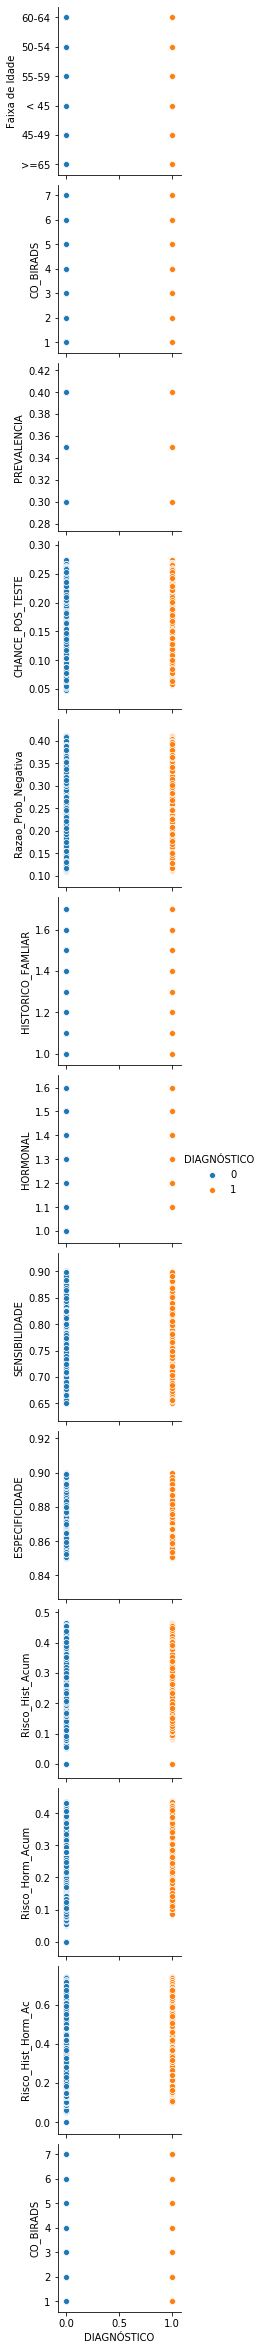

In [3]:
#Analise Distribuição de Dados 
sns.pairplot(dt_diagnostico, x_vars = ['DIAGNÓSTICO'], y_vars=['Faixa de Idade', 'CO_BIRADS', 'PREVALENCIA', 'CHANCE_POS_TESTE', 'Razao_Prob_Negativa', 'HISTORICO_FAMLIAR', 
                                                                'HORMONAL', 'SENSIBILIDADE', 'ESPECIFICIDADE', 'Risco_Hist_Acum', 'Risco_Horm_Acum', 'Risco_Hist_Horm_Ac',
                                                               'CO_BIRADS'], hue= 'DIAGNÓSTICO')

In [4]:
#Proporção de Diagnóstico Positivos

positive_proportion = dt_diagnostico['DIAGNÓSTICO'].value_counts()[1]/(len(dt_diagnostico))
print('Proporção de diagnósticos positivos:', round(positive_proportion,2))

Proporção de diagnósticos positivos: 0.36


# CORELAÇÃO

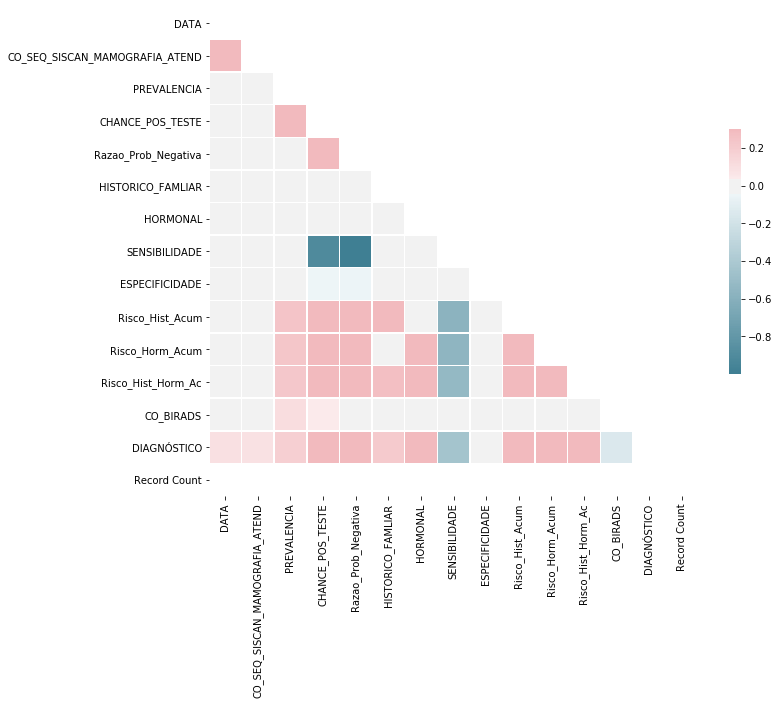

In [5]:
corr = dt_diagnostico.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
#Standart Scaler

features = ["PREVALENCIA", "HISTORICO_FAMLIAR", "HORMONAL", "SENSIBILIDADE", "ESPECIFICIDADE", "CO_BIRADS"]
autoscaler = StandardScaler()
dt_diagnostico[features] = autoscaler.fit_transform(dt_diagnostico[features])

In [7]:
X = dt_diagnostico[["PREVALENCIA", "HISTORICO_FAMLIAR", "HORMONAL", "SENSIBILIDADE", "ESPECIFICIDADE", "CO_BIRADS"]]
y = dt_diagnostico['DIAGNÓSTICO']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

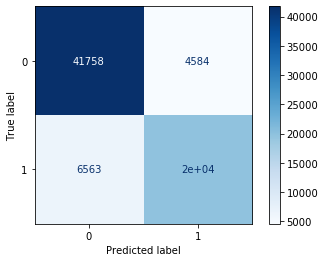

In [11]:
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

In [12]:
print(f"""Acurácia: {accuracy_score(y_test, y_pred_lr)}\n\ 
          Precisão: {precision_score(y_test, y_pred_lr)} \n\
          Recall: {recall_score(y_test, y_pred_lr)}""")

Acurácia: 0.8465065682575528
\ 
          Precisão: 0.8113657874161557 
          Recall: 0.7502663622526636


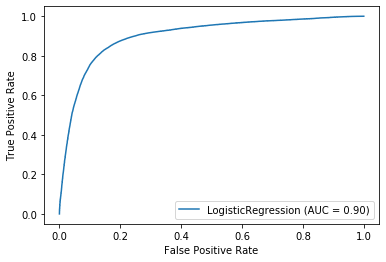

In [13]:
plot_roc_curve(lr, X_test, y_test)

# BALEANCAR ALGORITIMO

In [14]:
from collections import Counter 

randUnderSampler = RandomUnderSampler(random_state=42)
X_rus, y_rus = randUnderSampler.fit_resample(X_train, y_train)

randOverSampler = RandomOverSampler(random_state=42)
X_ros, y_ros = randOverSampler.fit_resample(X_train, y_train)

print('Original dataset: ', Counter(y_train))
print('Undersampled dataset: ', Counter(y_rus))
print('Overampled dataset: ', Counter(y_ros))

Original dataset:  Counter({0: 94017, 1: 53427})
Undersampled dataset:  Counter({0: 53427, 1: 53427})
Overampled dataset:  Counter({0: 94017, 1: 94017})


In [15]:
# Fit a model without balacing technics
model_baseline = LogisticRegression(max_iter=2000, random_state=42)
model_baseline.fit(X_train, y_train)

# Fit a model with class weight
model_weighted = LogisticRegression(max_iter=2000, random_state=42, class_weight={0:1,1:2})
model_weighted.fit(X_train, y_train)

# Fit model without random under sampling
model_rus = LogisticRegression(max_iter=2000, random_state=42)
model_rus.fit(X_rus, y_rus)

# Fit model without random over sampling
model_ros = LogisticRegression(max_iter=2000, random_state=42)
model_ros.fit(X_ros, y_ros)

LogisticRegression(max_iter=2000, random_state=42)

# Comparando a matriz de confusão (Random Undersampling)

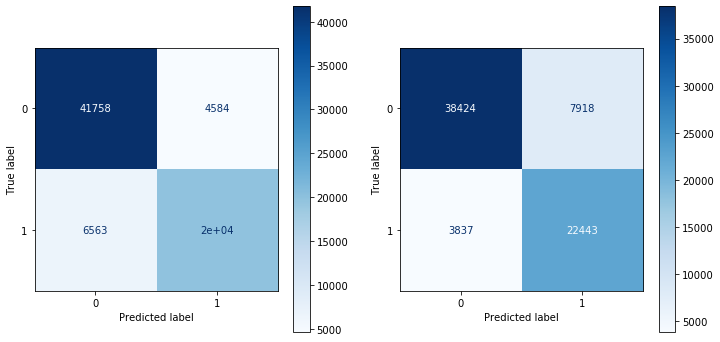

In [16]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plot_confusion_matrix(model_baseline, X_test, y_test, cmap='Blues', ax=ax1)
plot_confusion_matrix(model_rus, X_test, y_test, cmap='Blues', ax=ax2)
plt.show()

# Comparando a matriz de confusão (Random Oversampling)

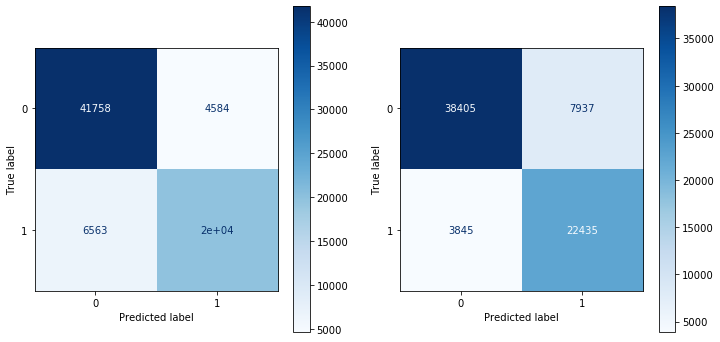

In [17]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plot_confusion_matrix(model_baseline, X_test, y_test, cmap='Blues', ax=ax1)
plot_confusion_matrix(model_ros, X_test, y_test, cmap='Blues', ax=ax2)
plt.show()

# Comparação dos Classificadores

In [18]:
# SKIPE FROM SLIDE
def compare_models():
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')

    models = [model_baseline, model_weighted, model_rus, model_ros]
    names =  ['baseline', 'weighted', 'rus', 'ros']
    avg_p = []
    roc_auc = []
    for model,name, k in zip(models, names, 'bgrcmykw'):
        pred_prob = model.predict_proba(X_test)[:,1]
        p,r,_ = precision_recall_curve(y_test,pred_prob)

        roc_auc.append(round(roc_auc_score(y_test, pred_prob), 3))
        avg_p.append(round(average_precision_score(y_test, pred_prob), 3))

        tpr,fpr,_ = roc_curve(y_test,pred_prob)
        ax1.plot(r,p,c=k,label=name, alpha=0.8,  linewidth=0.7)
        ax2.plot(tpr,fpr,c=k,label=name, alpha=0.8,  linewidth=0.7)

    ax1.legend(loc='lower right')    
    ax2.legend(loc='lower right')
    
    plt.show()
    return  pd.DataFrame({'models' : names, 'avg. precision': avg_p, 'roc auc': roc_auc})

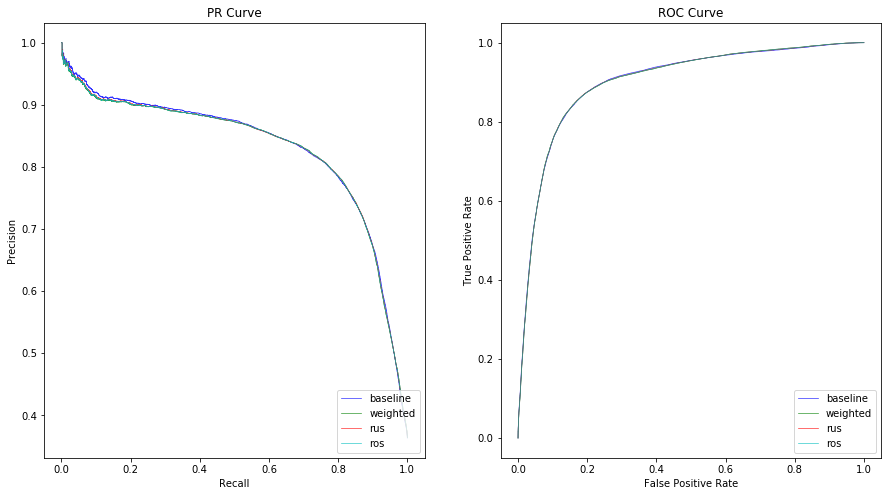

In [19]:
compare_df = compare_models()

In [20]:
compare_df

,models,avg. precision,roc auc
0,baseline,0.832,0.901
1,weighted,0.829,0.901
2,rus,0.830,0.901
3,ros,0.830,0.901


In [21]:
models = [model_baseline, model_weighted, model_rus, model_ros]
for i in models:
    
    y_pred = i.predict(X_test)
    print(f'**{type(i).__name__}**')
    print(f"Acurácia:{round(accuracy_score(y_test, y_pred),2)}")
    print(f"Precisão:{round(precision_score(y_test, y_pred),2)}")
    print(f"Recall  :{round(recall_score(y_test, y_pred),2)}")
    print('________________________')

**LogisticRegression**
Acurácia:0.85
Precisão:0.81
Recall  :0.75
________________________
**LogisticRegression**
Acurácia:0.83
Precisão:0.72
Recall  :0.87
________________________
**LogisticRegression**
Acurácia:0.84
Precisão:0.74
Recall  :0.85
________________________
**LogisticRegression**
Acurácia:0.84
Precisão:0.74
Recall  :0.85
________________________


# Naive Bayes

In [22]:
nb = GaussianNB()
nb.fit(X_rus, y_rus)
y_pred_nb = nb.predict(X_test)

In [23]:
#Undersampled - Naive Bayes

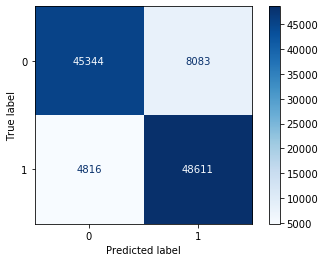

In [24]:
plot_confusion_matrix(nb, X_rus, y_rus, cmap = 'Blues')

In [25]:
print(f"""Acurácia: {accuracy_score(y_test, y_pred_nb)}\n\ 
          Precisão: {precision_score(y_test, y_pred_nb)} \n\
          Recall: {recall_score(y_test, y_pred_nb)}""")

Acurácia: 0.8713475255432238
\ 
          Precisão: 0.7748352967903158 
          Recall: 0.9084855403348554


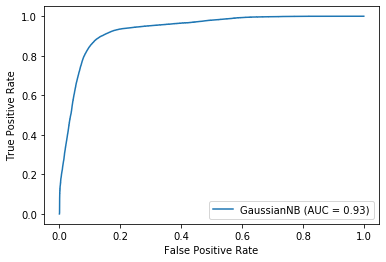

In [26]:
plot_roc_curve(nb, X_test, y_test)

In [27]:
#Overampled - Naive Bayes

In [28]:
nb_over = GaussianNB()
nb_over.fit(X_ros, y_ros)
y_pred_nb_over = nb_over.predict(X_test)

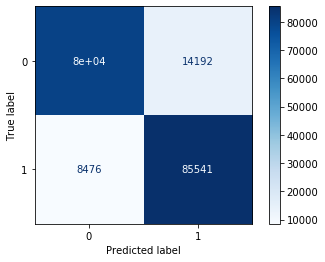

In [29]:
plot_confusion_matrix(nb_over, X_ros, y_ros, cmap = 'Blues')

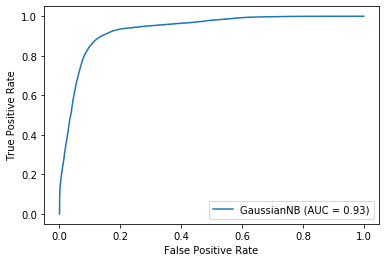

In [30]:
plot_roc_curve(nb_over, X_test, y_test)